In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


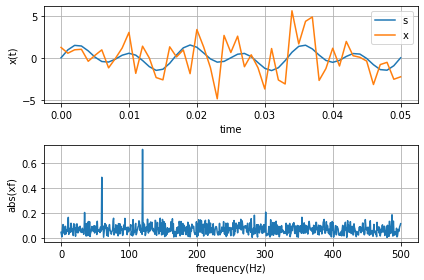

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fmax = 1000      # sampling frequency 1000 Hz
dt = 1/fmax      # sampling period
N  = 1500      # length of signal

t  = np.arange(0,N)*dt   # time = [0, dt, ..., (N-1)*dt]

s = 0.7*np.sin(2*np.pi*60*t) + np.sin(2*np.pi*120*t)

x = s+2*np.random.randn(N)   # random number Normal distn, N(0,2)... N(0,2*2)

plt.subplot(2,1,1)
plt.plot(t[0:51],s[0:51],label='s')
plt.plot(t[0:51],x[0:51],label='x')
plt.legend()
plt.xlabel('time'); plt.ylabel('x(t)'); plt.grid()

# Fourier spectrum

df = fmax/N   # df = 1/N = fmax/N
f = np.arange(0,N)*df     #   frq = [0, df, ..., (N-1)*df]

xf = np.fft.fft(x)*dt

plt.subplot(2,1,2)
plt.plot(f[0:int(N/2+1)],np.abs(xf[0:int(N/2+1)]))
plt.xlabel('frequency(Hz)'); plt.ylabel('abs(xf)'); plt.grid()
plt.tight_layout()

In [4]:
import pandas as pd

read_data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/TimeSeries/bitcoin_DTW/dataset/bitcoin.csv')
read_data['Close'].describe()

count     1743.000000
mean      1410.693855
std       2870.884122
min         68.430000
25%        273.815000
50%        477.750000
75%        840.600000
max      19497.400000
Name: Close, dtype: float64

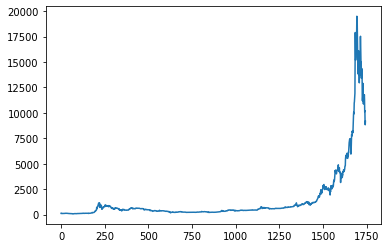

In [5]:
import matplotlib.pyplot as plt
close_data = read_data['Close']
plt.plot(close_data)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
 
fs = 100 
t = np.arange(0, 3, 1 / fs)
f1 = 35
f2 = 10
signal = 0.6 * np.sin(2 * np.pi * f1 * t) + 3 * np.cos(2 * np.pi * f2 * t + np.pi/2)
 
fft = np.fft.fft(signal) / len(signal)  
 
fft_magnitude = abs(fft)    

In [7]:
t.shape

(300,)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


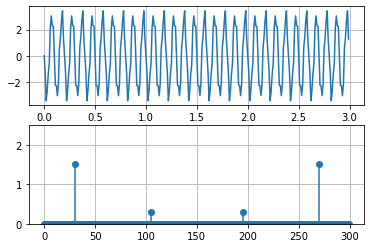

In [8]:
plt.subplot(2,1,1)
plt.plot(t,signal)
plt.grid()
 
plt.subplot(2,1,2)
plt.stem(fft_magnitude)
plt.ylim(0,2.5)
plt.grid()                                                                                 
 
plt.show()

In [0]:
close_data.size
data = close_data

In [0]:
size = data.size
max = data.max()
t = np.arange(0, size) * 1/max # t = 데이터 갯수를 의미

f1 = 10
f2 = 60
signal = 0.6 * np.sin(2 * np.pi * f1 * t) + 3 * np.cos(2 * np.pi * f2 * t + np.pi/2) # f1, f2는 어떠한 주파수 ㅈ
fft = np.fft.fft(signal) / len(signal)  
fft_magnitude = abs(fft)
type(fft_magnitude)
ind = np.argpartition(fft, -20)[-20:] #np.array

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


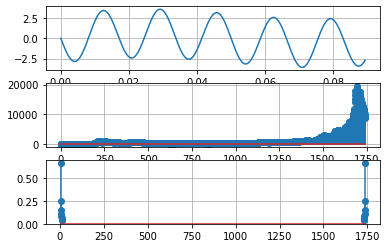

In [11]:
plt.subplot(3,1,1)
plt.plot(t,signal)
plt.grid()
 
plt.subplot(3,1,2)
plt.stem(data)
plt.grid()

plt.subplot(3,1,3)
plt.stem(ind,fft_magnitude[ind])
plt.ylim(0,)
plt.grid()

plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


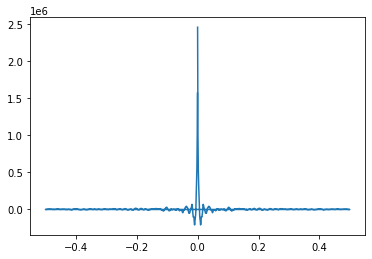

In [12]:
fft = np.fft.fft(data)
freq = np.fft.fftfreq(t.shape[-1])

plt.plot(freq, fft)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


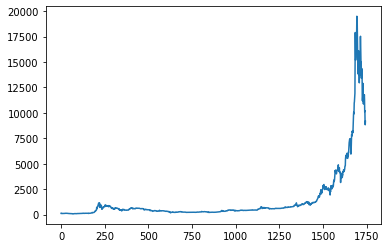

In [13]:
iy = np.fft.ifft(fft)

plt.plot(iy)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the

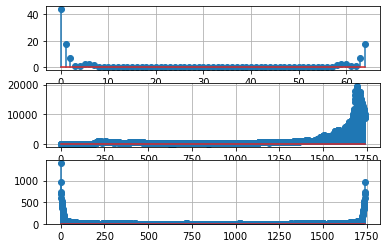

In [14]:
Hyman_data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/TimeSeries/bitcoin_DTW/HymanMinsky.csv')
Hyman_data = Hyman_data['y']

fft = np.fft.fft(data) / len(data)
Hyman_ffted_data = np.fft.fft(Hyman_data) / len(Hyman_data)

fft_magnitude = abs(fft)
Hyman_ffted_magnitude = abs(Hyman_ffted_data)


plt.subplot(3,1,1)
plt.stem(Hyman_ffted_magnitude)
plt.grid()

plt.subplot(3,1,2)
plt.stem(data)
plt.grid()

plt.subplot(3,1,3)
plt.stem(fft_magnitude)
plt.ylim(0,)
plt.grid()

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


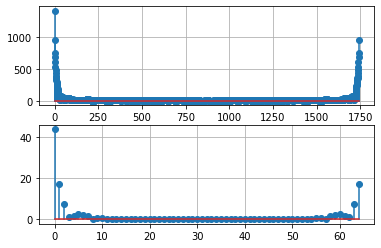

In [15]:
#fft_ind = np.argpartition(fft_magnitude, -5)[-5:]
#iffted_magnitude_ind = np.argpartition(iffted_magnitude, -10)[-10:]

plt.subplot(2,1,1)
plt.stem(fft_magnitude)
plt.grid()
plt.subplot(2,1,2)
plt.stem(Hyman_ffted_magnitude)
plt.grid()

plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


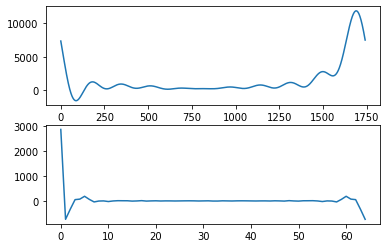

In [16]:

Hyman_ffted_data = np.fft.fft(Hyman_data)

fft = np.fft.fft(data)
csp = np.copy(fft)
csp[10:-10] = 0

iffted_data = np.fft.ifft(csp)

plt.subplot(2, 1, 1)
plt.plot(iffted_data)

plt.subplot(2, 1, 2)
plt.plot(Hyman_ffted_data)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


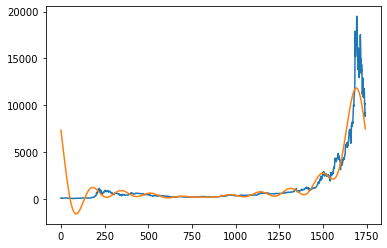

In [17]:
fft = np.fft.fft(data)
csp = np.copy(fft)
csp[10:-10] = 0

iffted_data = np.fft.ifft(csp)
plt.plot(data)
plt.plot(iffted_data)

plt.show()

In [18]:
csp.shape

(1743,)

In [19]:
type(fft[1])

numpy.complex128

In [20]:
Hyman_data.shape

(65,)